In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Freelance Platform Projects.csv')
df.head()

#imported CSV

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [3]:
df.shape
#checking shape of dataset

(12222, 17)

In [4]:
df.info()
#this command help to provide all information like datatypes , null counts and name of columns in data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [5]:
df['Currency'].unique()

array(['EUR', 'GBP', 'USD'], dtype=object)

In [6]:
def convert_to_usd(data):
    conversion = {'EUR': 1.07, 'GBP': 1.24, 'USD': 1}
    data['Budget'] = [data.loc[i,'Budget'] * conversion[data.loc[i,'Currency']] for i in data.index]
    data.drop(columns=['Currency'], axis=1, inplace=True)
    return data

#making data more fesiable

In [7]:
df = convert_to_usd(df)
df.head()
#making data more fesiable

,Title,Category Name,Experience,Sub Category Name,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,64.20,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,24.80,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,14.88,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,17.36,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,10000.00,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [8]:
df.isna().sum()

#here checking all null values from the dataset

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [9]:
newdf = df.dropna(axis =1)
print('shape of df:{}'.format(df.shape))
print('shape of newdf:{}'.format(newdf.shape))

#droped null values and saved in newdataset insted of changing ori data set

shape of df:(12222, 16)
shape of newdf:(12222, 14)


In [10]:
#imputation(fill with value)

mean = df['Budget'].mean()
mean 

265.8107691048928

In [11]:
df['Duration'].fillna(mean,inplace=True) 

#taken mean of onr column values and imputed to null values.

In [12]:
df.isna().sum()

Title                           0
Category Name                   0
Experience                      0
Sub Category Name               0
Budget                          0
Location                        0
Freelancer Preferred From       0
Type                            0
Date Posted                     0
Description                     0
Duration                        0
Client Registration Date        0
Client City                     0
Client Country                  0
Client Currency                 0
Client Job Title             7634
dtype: int64

In [13]:
df['Client Job Title'].fillna(mean,inplace=True) 

In [14]:
df.isna().sum()

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Description                  0
Duration                     0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
Client Job Title             0
dtype: int64

In [15]:
df_cat = df.select_dtypes(object)
df_cat.head()

#assignmed one variable for checking objects

,Title,Category Name,Experience,Sub Category Name,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,265.810769,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,265.810769,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,265.810769,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,265.810769,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",265.810769,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [16]:
df_num = df.select_dtypes('int64','float64')
df_num

#assignmed one variable for checking int64','float64',

""
0
1
2
3
4
...
12217
12218
12219
12220


In [17]:
dty1=df.columns[df.dtypes==float]

In [18]:
from sklearn.preprocessing import LabelEncoder
for i in dty1:
    le=LabelEncoder()
    df[i] = le.fit_transform(df[i])
    
    
#labelEncoding done to convert object data to intdata

In [19]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,130,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,265.810769,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,44,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,265.810769,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,16,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,265.810769,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,24,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,265.810769,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,868,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",265.810769,2016-07-01,Mumbai,India,USD,Guest posts buyer


<Axes: >

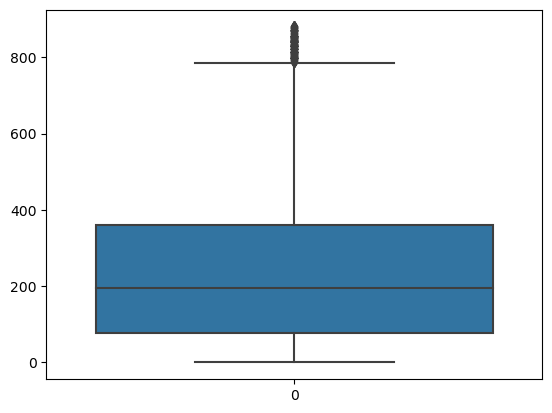

In [20]:
import seaborn as sns
sns.boxplot (df['Budget']) 

#checking outliers

In [21]:
condition = df['Budget']>600
outliers = df[condition]
newdf = df.drop(outliers.index,axis=0)
print('shape of df:{}'.format(df.shape))
print('shape of newdf:{}'.format(newdf.shape))

#removing outliers by condition

shape of df:(12222, 16)
shape of newdf:(11058, 16)


<Axes: >

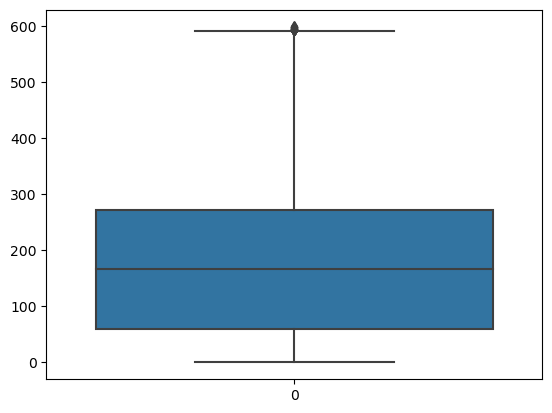

In [22]:
import seaborn as sns
sns.boxplot (newdf['Budget']) 

In [23]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Budget',
       'Location', 'Freelancer Preferred From', 'Type', 'Date Posted',
       'Description', 'Duration', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

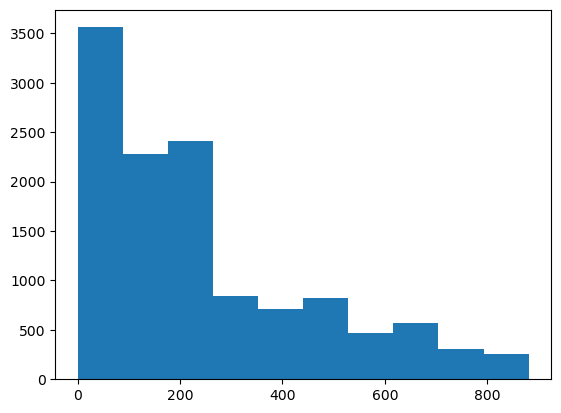

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['Budget'])
plt.show()
#here data is right skewed

In [25]:
#we can remove skewness buy using boxcox transormation but here used log methode as boxcox not worked for negative values

In [26]:
df['Budget'].skew()

1.0501266615939149

In [27]:
import math
#math.log(df['Budget'])
df['Budget'] = df['Budget'].apply(math.sqrt)
df['Budget']



0        11.401754
1         6.633250
2         4.000000
3         4.898979
4        29.461840
           ...    
12217    11.180340
12218    13.038405
12219    11.180340
12220     9.000000
12221    13.928388
Name: Budget, Length: 12222, dtype: float64

In [28]:
df['Budget'].skew()

0.25364996386102195

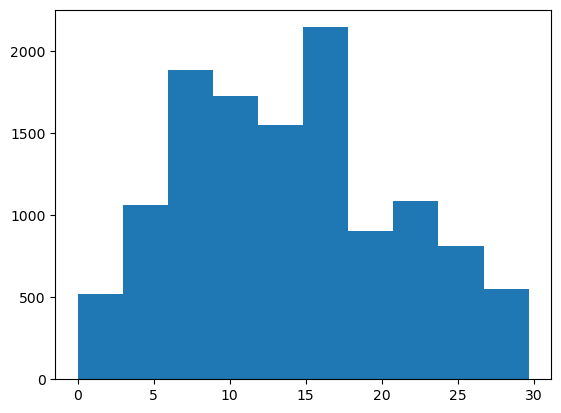

In [29]:
plt.hist(df['Budget'])
plt.show()

#now data properly skewed. 